In [156]:
import pandas as pd
import numpy as np
print("success")

success


In [157]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [158]:
X = df.drop(columns=['output'])
y = df['output']

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.4, random_state=10)

In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [161]:

import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve,roc_curve, auc, roc_auc_score
from sklearn.metrics import balanced_accuracy_score

In [162]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

C:\Users\23adsb72\AppData\Local\Temp\ipykernel_11888\62119899.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  nb_model.fit(X_train, y_train.ravel())


GaussianNB()

In [163]:
preds = nb_model.predict(X_test)

In [164]:
accuracy_score(y_test, preds)

0.8114754098360656

Confusion Matrix
[[45 18]
 [ 5 54]]


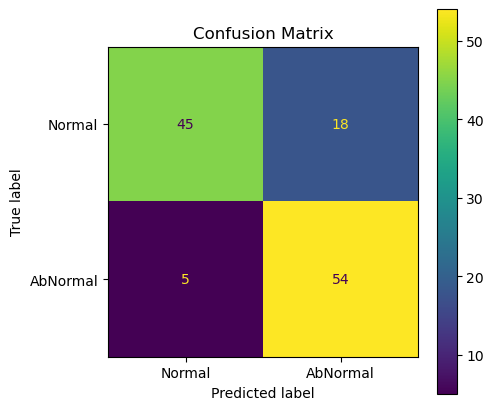

In [165]:
classes = ["Normal","AbNormal"]
cm = confusion_matrix(y_test,preds)

print('Confusion Matrix')
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=classes)
fig, ax = plt.subplots(figsize=(5,5))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [166]:
Accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy:', Accuracy*100)

Precision = metrics.precision_score(y_test, preds)
print('Precision:', Precision*100)

Recall = metrics.recall_score(y_test, preds)
print('Recall:', Recall*100)

F1_score = metrics.f1_score(y_test, preds)
print('F1 Score:', F1_score*100)

Accuracy: 81.14754098360656
Precision: 75.0
Recall: 91.52542372881356
F1 Score: 82.44274809160305


ROC AUC score: 0.815
Mean ROC AUC: 0.81477


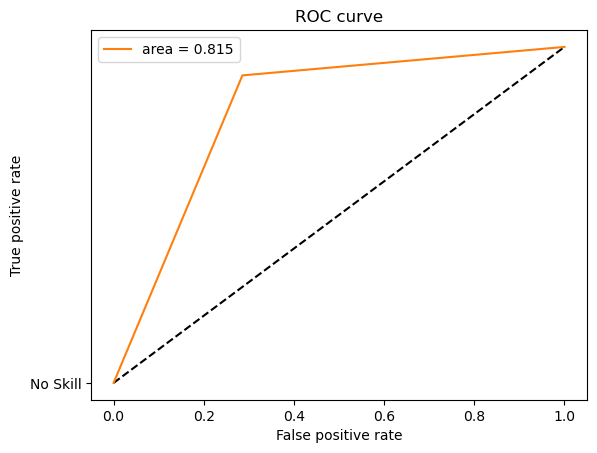

In [168]:
roc_auc = roc_auc_score(y_test,preds)
print('ROC AUC score: %.3f' % roc_auc)
print('Mean ROC AUC: %.5f' % roc_auc.mean())

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,preds)

auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--' ,'No Skill')
plt.plot(fpr_keras, tpr_keras, label = 'area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc = 'best')
plt.show()

In [169]:
target_names=['Normal', 'Abnormal']
print(classification_report(preds, y_test,target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.71      0.90      0.80        50
    Abnormal       0.92      0.75      0.82        72

    accuracy                           0.81       122
   macro avg       0.81      0.82      0.81       122
weighted avg       0.83      0.81      0.81       122

